In [1]:
!nvidia-smi

Sun Jun  2 15:01:45 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 Ti     Off |   00000000:01:00.0  On |                  N/A |
|  0%   53C    P5             85W /  350W |    2137MiB /  12288MiB |     24%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!git clone https://github.com/ultralytics/JSON2YOLO

fatal: destination path 'JSON2YOLO' already exists and is not an empty directory.


In [2]:
%pip install -r JSON2YOLO/requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install kaggle ipywidgets widgetsnbextension -q

Note: you may need to restart the kernel to use updated packages.


Скачиваем датасет

In [3]:
#import os
#os.environ['KAGGLE_USERNAME'] = "gbull25"
#os.environ['KAGGLE_KEY'] = "ec5621c43cb4790ce0f41e60d644b2e6"
#!kaggle datasets download -d watchman/rtsd-dataset

In [2]:
#import zipfile
#archive = zipfile.ZipFile('rtsd-dataset.zip', 'r')
#archive.extractall('.')
#os.remove('rtsd-dataset.zip')

### Импорт библиотек

In [4]:
import pandas as pd
import os
from tqdm.notebook import tqdm
from shutil import copyfile, move
import sys
import json
from ipywidgets import FloatProgress

In [5]:
from JSON2YOLO.general_json2yolo import convert_coco_json
sys.path.append('./JSON2YOLO')

test_path = 'test_annotation'
train_path = 'train_annotation'

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

Форматирование датасета 

In [7]:
#move('train_anno.json', os.path.join(train_path, 'train_anno.json'))
#move('val_anno.json', os.path.join(test_path, 'val_anno.json'))
#for folder in ['labels', 'images']:
#    for path in [test_path, train_path]:
#        os.makedirs(os.path.join(path, folder), exist_ok=True)

In [8]:
#convert_coco_json(train_path)
#for file in tqdm(os.listdir(os.path.join('new_dir/labels/train_anno'))):
#    move(os.path.join('new_dir/labels/train_anno', file), os.path.join(train_path, 'labels', file))

#convert_coco_json('./test_annotation/')
#for file in tqdm(os.listdir(os.path.join('new_dir/labels/val_anno'))):
#    move(os.path.join('new_dir/labels/val_anno', file), os.path.join(test_path, 'labels', file))

In [10]:
test_path = 'test_annotation'
train_path = 'train_annotation'

test_labels = os.listdir(os.path.join(test_path, 'labels'))
train_labels = os.listdir(os.path.join(train_path, 'labels'))

test_labels = set(map(lambda x: x.split('.')[0], test_labels))
train_labels = set(map(lambda x: x.split('.')[0], train_labels))

In [11]:
images = 'rtsd-frames/rtsd-frames'
for file in os.listdir(images):
    name = file.split('.')[0]
    if name in train_labels:
        move(os.path.join(images, file), os.path.join(train_path,'images', file))
    if name in test_labels:
        move(os.path.join(images, file), os.path.join(test_path,'images', file))

In [13]:
%pip install PyYAML -q

Note: you may need to restart the kernel to use updated packages.


In [14]:
import yaml
data = [{
    'train': 'train_annotation/images',
    'val': 'test_annotation/images',
    'nc': 155,
    'names': ['2_1', '1_23', '1_17', '3_24', '8_2_1', '5_20', '5_19_1', '5_16', '3_25',
              '6_16', '7_15', '2_2', '2_4', '8_13_1', '4_2_1', '1_20_3', '1_25', '3_4', '8_3_2',
              '3_4_1', '4_1_6', '4_2_3', '4_1_1', '1_33', '5_15_5', '3_27', '1_15', '4_1_2_1',
              '6_3_1', '8_1_1', '6_7', '5_15_3', '7_3', '1_19', '6_4', '8_1_4', '8_8', '1_16',
              '1_11_1', '6_6', '5_15_1', '7_2', '5_15_2', '7_12', '3_18', '5_6', '5_5', '7_4',
              '4_1_2', '8_2_2', '7_11', '1_22', '1_27', '2_3_2', '5_15_2_2', '1_8', '3_13',
              '2_3', '8_3_3', '2_3_3', '7_7', '1_11', '8_13', '1_12_2', '1_20', '1_12', '3_32',
              '2_5', '3_1', '4_8_2', '3_20', '3_2', '2_3_6', '5_22', '5_18', '2_3_5', '7_5',
              '8_4_1', '3_14', '1_2', '1_20_2', '4_1_4', '7_6', '8_1_3', '8_3_1', '4_3', '4_1_5',
              '8_2_3', '8_2_4', '1_31', '3_10', '4_2_2', '7_1', '3_28', '4_1_3', '5_4', '5_3',
              '6_8_2', '3_31', '6_2', '1_21', '3_21', '1_13', '1_14', '2_3_4', '4_8_3', '6_15_2',
              '2_6', '3_18_2', '4_1_2_2', '1_7', '3_19', '1_18', '2_7', '8_5_4', '5_15_7', '5_14',
              '5_21', '1_1', '6_15_1', '8_6_4', '8_15', '4_5', '3_11', '8_18', '8_4_4', '3_30',
              '5_7_1', '5_7_2', '1_5', '3_29', '6_15_3', '5_12', '3_16', '1_30', '5_11', '1_6',
              '8_6_2', '6_8_3', '3_12', '3_33', '8_4_3', '5_8', '8_14', '8_17', '3_6', '1_26',
              '8_5_2', '6_8_1', '5_17', '1_10', '8_16', '7_18', '7_14', '8_23']}]

In [15]:
len(data[0]['names'])

155

In [16]:
def write_yaml_to_file(py_obj, filename) :
    with open(f'{filename}.yaml', 'w+',) as f:
        yaml.dump_all(py_obj, f, sort_keys=False)
write_yaml_to_file(data, 'trafic_signs')

In [17]:
%pip install ultralytics -q


Note: you may need to restart the kernel to use updated packages.


In [18]:
from ultralytics import YOLO
import torch
import gc

gc.collect()
torch.cuda.empty_cache()

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [21]:
model = YOLO('yolov8l.pt')

results = model.train(
   data='trafic_signs.yaml',
   imgsz=640,
   epochs=100,
   batch=5,
   device=0,
   name='YOLOv8l'
)

New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12016MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=trafic_signs.yaml, epochs=100, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=YOLOv8l14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/train_annotation/labels.cache... 54188 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54188/54188 [00:00<?, ?it/s]
val: Scanning /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/test_annotation/labels.cache... 5000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


Plotting labels to runs/detect/YOLOv8l14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005078125), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/YOLOv8l14
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.02G      1.109      1.926     0.8543          9        640: 100%|██████████| 10838/10838 [19:53<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 500/500 [00:25<00:00, 19.76it/s]


                   all       5000       8866       0.61      0.408      0.437      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.58G      1.114     0.9944      0.857         12        640: 100%|██████████| 10838/10838 [18:30<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 500/500 [00:26<00:00, 19.08it/s]


                   all       5000       8866      0.648      0.456      0.552      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.57G      1.139     0.9903     0.8624         24        640:  33%|███▎      | 3531/10838 [06:38<15:03,  8.09it/s]

In [ ]:
model = YOLO('runs/detect/YOLOv8l11/weights/best.pt')

In [ ]:
results = model("/home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images", conf = 0.1)


image 1/2 /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images/00634d6d9eee67bf1bbfdc6ca5cb3aee.png: 448x640 1 5_19_1, 1 6_16, 1 2_4, 1 8_13_1, 1 4_2_3, 1 4_3, 1 4_2_2, 1 4_1_3, 1 8_15, 10.1ms
image 2/2 /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images/1bda6de7429e8ec9bc2f4976e54f8dd4.png: 352x640 6 5_19_1s, 1 6_16, 1 2_4, 1 4_1_1, 2 3_27s, 1 5_15_7, 9.9ms
Speed: 6.2ms preprocess, 10.0ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


In [ ]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 12.,   6.,  21.,  94.,  91.,  85.,  13.,   9., 121.], device='cuda:0')
conf: tensor([0.9258, 0.8580, 0.6265, 0.4346, 0.3707, 0.2520, 0.2105, 0.1370, 0.1128], device='cuda:0')
data: tensor([[1.2367e+03, 3.2559e+02, 1.3765e+03, 4.5564e+02, 9.2582e-01, 1.2000e+01],
        [1.0281e+03, 2.6694e+02, 1.1885e+03, 4.2758e+02, 8.5796e-01, 6.0000e+00],
        [9.6146e+02, 4.0012e+02, 1.0426e+03, 4.8839e+02, 6.2648e-01, 2.1000e+01],
        [7.3486e+02, 3.9359e+02, 9.9092e+02, 6.4796e+02, 4.3462e-01, 9.4000e+01],
        [7.3805e+02, 3.9333e+02, 9.6521e+02, 6.4621e+02, 3.7067e-01, 9.1000e+01],
        [1.2446e+03, 5.6947e+02, 1.3651e+03, 6.8460e+02, 2.5198e-01, 8.5000e+01],
        [1.2402e+03, 4.5468e+02, 1.3701e+03, 5.7349e+02, 2.1049e-01, 1.3000e+01],
        [1.2403e+03, 4.5544e+02, 1.3700e+03, 5.7303e+02, 1.3696e-01, 9.0000e+00],
        [1.2399e+03, 4.5465e+02, 1.3707e+03, 5.7353e+02, 1.1279e-01, 1.2100e+02]], device='

In [ ]:
x1, y1, x2, y2 =  map(int, results[0].boxes.xyxy[0].tolist())
x1, y1, x2, y2

(1236, 325, 1376, 455)

140

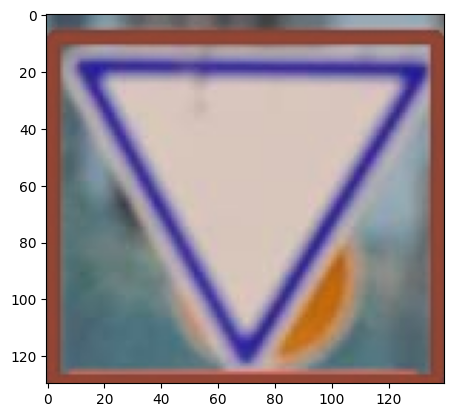

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images/00634d6d9eee67bf1bbfdc6ca5cb3aee.png")
cropped_image = img[y1:y2, x1:x2]
plt.imshow(cropped_image)
len(cropped_image[0])


In [ ]:
from PIL import Image

In [ ]:
results

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([12.,  6., 21., 94., 91., 85.], device='cuda:0')
conf: tensor([0.9258, 0.8580, 0.6265, 0.4346, 0.3707, 0.2520], device='cuda:0')
data: tensor([[1.2367e+03, 3.2559e+02, 1.3765e+03, 4.5564e+02, 9.2582e-01, 1.2000e+01],
        [1.0281e+03, 2.6694e+02, 1.1885e+03, 4.2758e+02, 8.5796e-01, 6.0000e+00],
        [9.6146e+02, 4.0012e+02, 1.0426e+03, 4.8839e+02, 6.2648e-01, 2.1000e+01],
        [7.3486e+02, 3.9359e+02, 9.9092e+02, 6.4796e+02, 4.3462e-01, 9.4000e+01],
        [7.3805e+02, 3.9333e+02, 9.6521e+02, 6.4621e+02, 3.7067e-01, 9.1000e+01],
        [1.2446e+03, 5.6947e+02, 1.3651e+03, 6.8460e+02, 2.5198e-01, 8.5000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (1000, 1500)
shape: torch.Size([6, 6])
xywh: tensor([[1306.5759,  390.6165,  139.7501,  130.0457],
        [1108.2919,  347.2579,  160.4036,  160.6378],
        [1002.0326,  444.2558,   81.1505,   88.2625],
        [ 862.8921,  520.7745,  256.0613,

In [ ]:
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/vagabond/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/vagabond/snap/code/common/.cache/gio-modules/libgiolibproxy.so


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [ ]:
pre = model.predict(
    source="/home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images",                                                   
    imgsz=640,                                                 
    show_labels=True,                                           
    save=True,     
    save_crop = True,                                             
    name="rtsd-yolo/new_dir/images",                                                 
    conf=0.1,                                                   
    )


image 1/2 /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images/00634d6d9eee67bf1bbfdc6ca5cb3aee.png: 448x640 1 5_19_1, 1 6_16, 1 2_4, 1 8_13_1, 1 4_2_3, 1 4_3, 1 4_2_2, 1 4_1_3, 1 8_15, 66.2ms
image 2/2 /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images/1bda6de7429e8ec9bc2f4976e54f8dd4.png: 352x640 6 5_19_1s, 1 6_16, 1 2_4, 1 4_1_1, 2 3_27s, 1 5_15_7, 61.0ms
Speed: 1.0ms preprocess, 63.6ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/rtsd-yolo/new_dir/images8


In [ ]:
pre = model.predict(
    source="/home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images")   


image 1/2 /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images/00634d6d9eee67bf1bbfdc6ca5cb3aee.png: 448x640 1 5_19_1, 1 2_4, 1 4_2_3, 1 4_3, 1 4_2_2, 1 4_1_3, 11.1ms
image 2/2 /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/new_dir/images/1bda6de7429e8ec9bc2f4976e54f8dd4.png: 352x640 4 5_19_1s, 1 6_16, 1 2_4, 1 4_1_1, 2 3_27s, 1 5_15_7, 9.8ms
Speed: 5.5ms preprocess, 10.4ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/rtsd-yolo/new_dir/images6


In [ ]:
result = model.predict("../short-test-video.mp4", save=True, save_crop = True, conf=0.1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/500) /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/../short-test-video.mp4: 384x640 1 2_1, 1 3_24, 1 3_27, 1 4_3, 60.5ms
video 1/1 (frame 2/500) /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/../short-test-video.mp4: 384x640 1 2_1, 1 3_27, 1 4_3, 9.1ms
video 1/1 (frame 3/500) /home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/../short-test-video.mp4: 384x640 1 2_1, 1 5_16, 1 3_27, 1 4_3

In [ ]:
model = YOLO('/home/vagabond/Documents/signs-classification/jupyter/rtsd-yolo/yolov8s_35epochs_TrafficSigns155.pt')

In [ ]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '2_1', 1: '1_23', 2: '1_17', 3: '3_24', 4: '8_2_1', 5: '5_20', 6: '5_19_1', 7: '5_16', 8: '3_25', 9: '6_16', 10: '7_15', 11: '2_2', 12: '2_4', 13: '8_13_1', 14: '4_2_1', 15: '1_20_3', 16: '1_25', 17: '3_4', 18: '8_3_2', 19: '3_4_1', 20: '4_1_6', 21: '4_2_3', 22: '4_1_1', 23: '1_33', 24: '5_15_5', 25: '3_27', 26: '1_15', 27: '4_1_2_1', 28: '6_3_1', 29: '8_1_1', 30: '6_7', 31: '5_15_3', 32: '7_3', 33: '1_19', 34: '6_4', 35: '8_1_4', 36: '8_8', 37: '1_16', 38: '1_11_1', 39: '6_6', 40: '5_15_1', 41: '7_2', 42: '5_15_2', 43: '7_12', 44: '3_18', 45: '5_6', 46: '5_5', 47: '7_4', 48: '4_1_2', 49: '8_2_2', 50: '7_11', 51: '1_22', 52: '1_27', 53: '2_3_2', 54: '5_15_2_2', 55: '1_8', 56: '3_13', 57: '2_3', 58: '8_3_3', 59: '2_3_3', 60: '7_7', 61: '1_11', 62: '8_13', 63: '1_12_2', 64: '1_20', 65: '1_12', 66: '3_32', 67: '2_5', 68: '3_1', 69: '4_8_2'